# Data understanding

At the begining of project we need to start from data understanding. To know how many columns and rows are in data also is in dataset missing values. So let's begin 


In [1]:
import pandas as pd

#import data
data_test = "../data/test.csv"
data_train = "../data/train.csv"

#create dataframe
test = pd.read_csv(data_test)
train = pd.read_csv(data_train)

print(train.shape)
train.head()



(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

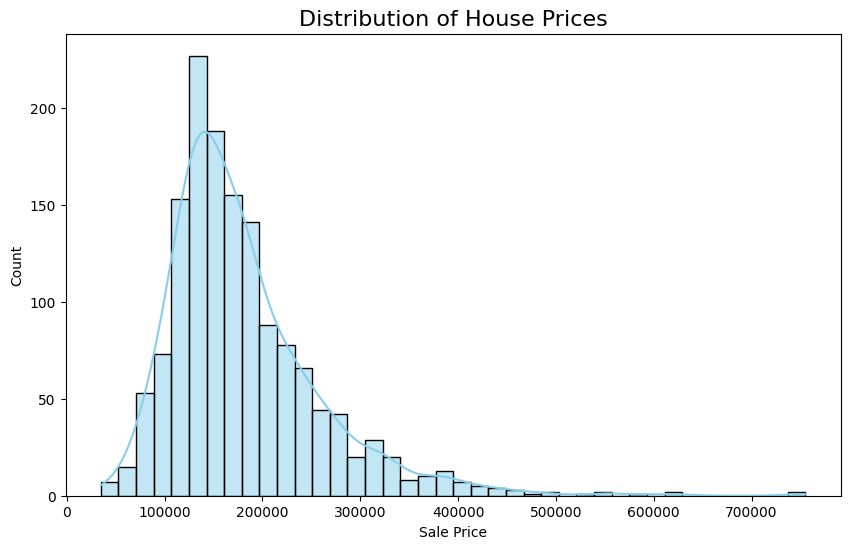

In [3]:
# Sale price вistribution histogram 
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

Most homes sell for between 100 000 - 200 000$. The distribution is right-skewed, meaning there are a small number of very expensive homes that could be influencing the mean. This suggests that it might be worth taking the target variable logarithm before modeling to reduce the effect of outliers.

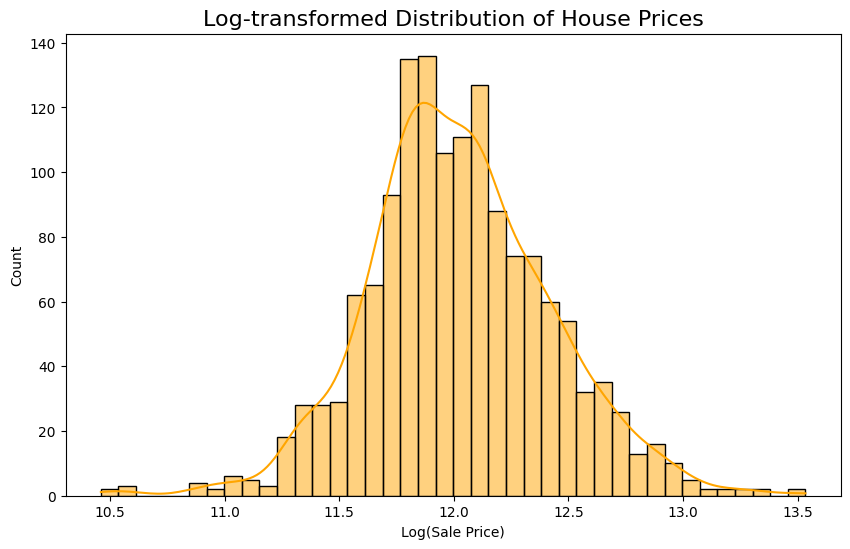

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=40, color='orange')
plt.title('Log-transformed Distribution of House Prices', fontsize=16)
plt.xlabel('Log(Sale Price)')
plt.ylabel('Count')
plt.show()

After logarithm, we can see that the distribution of the data has become much better. Accordingly, the predictive model will be more accurate.

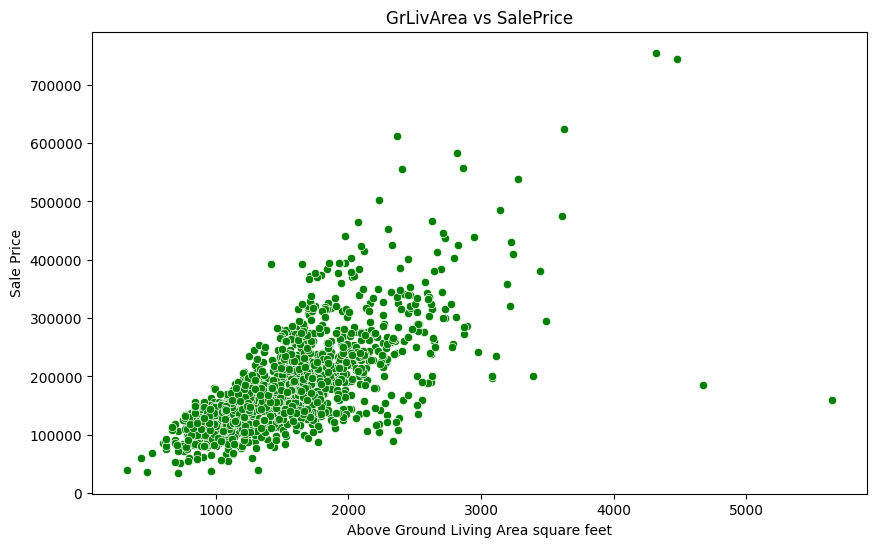

In [5]:
# Scatter plot: GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, color='green')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area square feet')
plt.ylabel('Sale Price')
plt.show()

The graph shows a significant dependence of the house price on the living space. This pattern holds true for houses up to 3000 square and less than 350 thousand. Outside of these values, we can find anomalous values that can negatively affect the predictive model.

C:\Users\XPS 15\AppData\Local\Temp\ipykernel_7428\1489618519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='viridis')


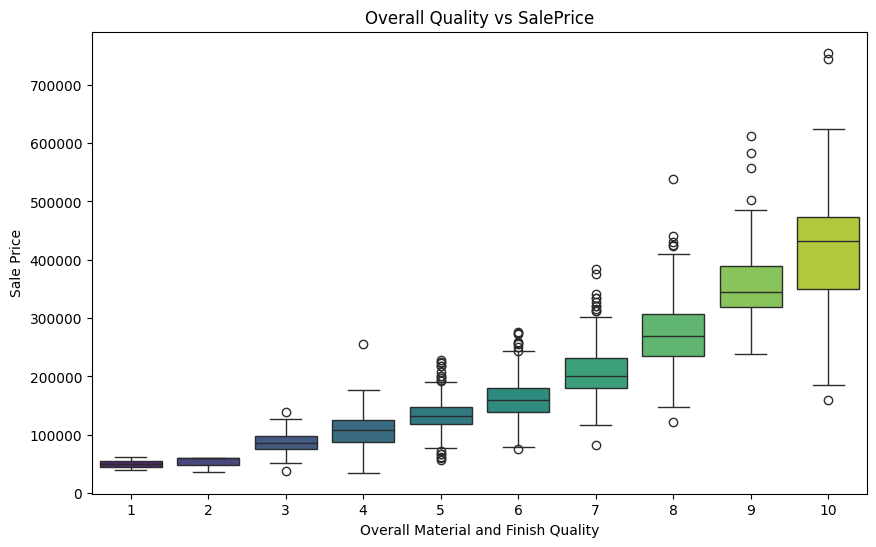

In [6]:
# Box plot: OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='viridis')
plt.title('Overall Quality vs SalePrice')
plt.xlabel('Overall Material and Finish Quality')
plt.ylabel('Sale Price')
plt.show()

Based on the graph, we can conclude that there is a strong positive correlation between the overall quality of the house (OverallQual) and its price (SalePrice). As the quality increases, so does the price. In addition, there are outliers in each group, which can be either real outliers or noise in the data. Groups 5, 6, and 7 have the most outliers, which indicates that these are the most numerous houses in the sample.Based on the data in the graph, we can conclude that there is a strong correlation between the general condition of the house and its price. In addition, each group has emissions, which may be random values. Groups 5, 6, and 7 have the most emissions, which suggests that there are more houses in this condition.

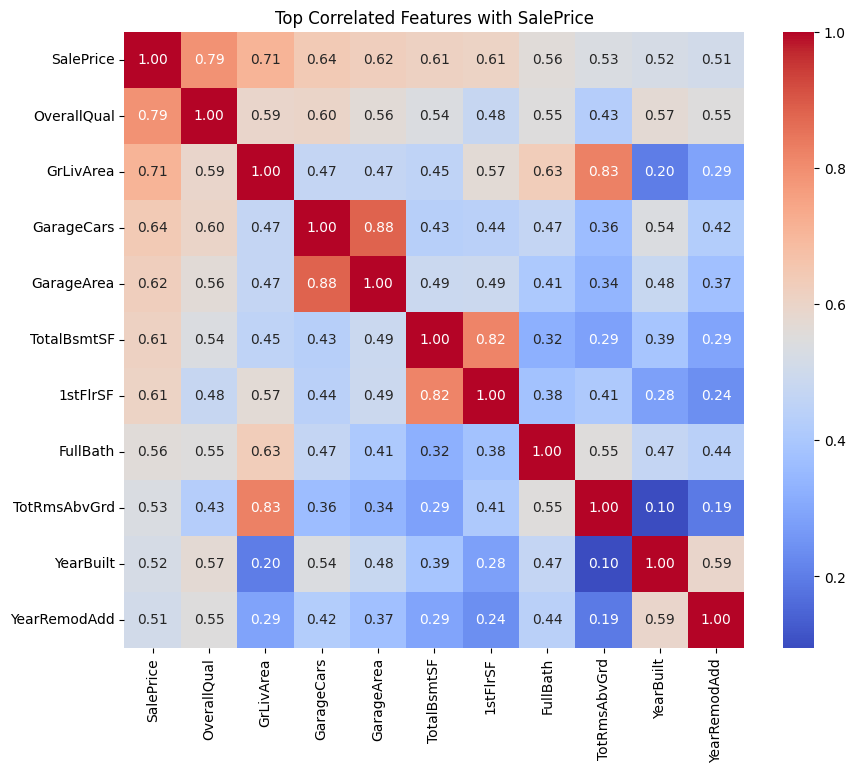

In [7]:
# Heatmap of correlation matrix (top correlated features)
correlation_matrix = train.corr(numeric_only=True)
top_corr = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with SalePrice')
plt.show()

The heatmap highlights which features have the strongest correlation with the sale price, helping us identify the most relevant variables for further analysis or modeling.

### Categorical variables

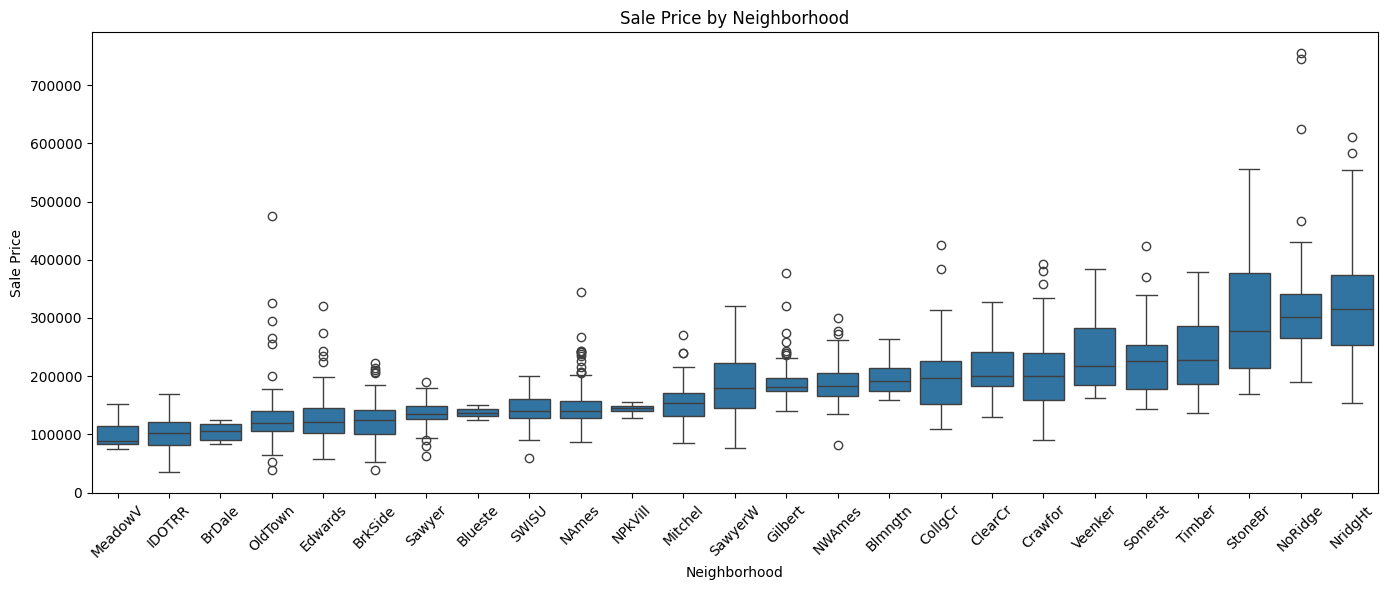

In [8]:
# Boxplot: SalePrice vs Neighborhood
plt.figure(figsize=(14, 6))
order = train.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(x='Neighborhood', y='SalePrice', data=train, order=order)
plt.xticks(rotation=45)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

This boxplot allows us to identify which neighborhoods are more prestigious based on higher median house prices. Despite some similarities between neighborhoods, clear differences in price levels suggest that location significantly influences home value.

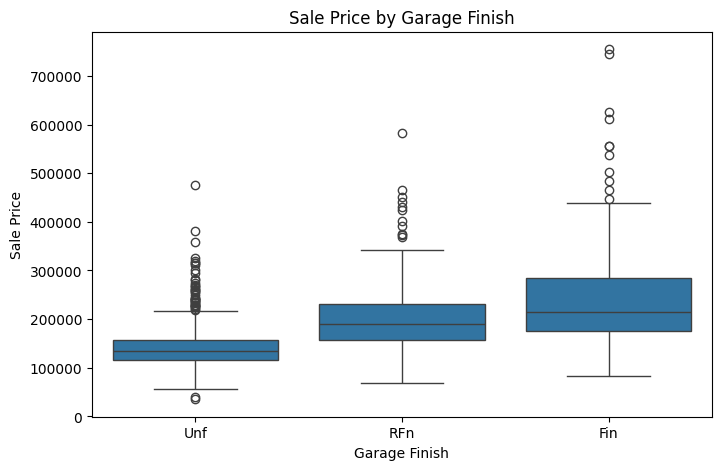

In [9]:
# Boxplot: GarageFinish vs SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='GarageFinish', y='SalePrice', data=train, order=['Unf', 'RFn', 'Fin'])
plt.title('Sale Price by Garage Finish')
plt.xlabel('Garage Finish')
plt.ylabel('Sale Price')
plt.show()

The boxplot shows that homes with a finished garage tend to have higher sale prices, while unfinished garages are associated with lower prices. This indicates that the garage finish is an important factor to consider in future modeling.

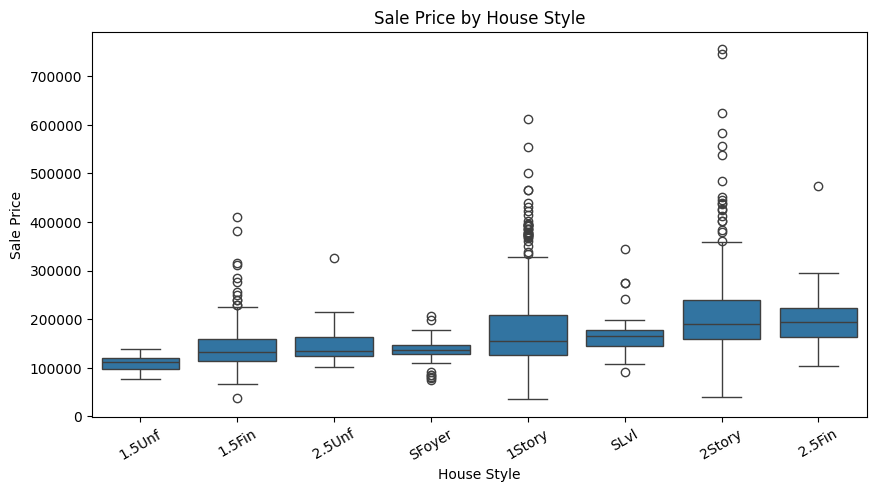

In [10]:
# Boxplot: HouseStyle vs SalePrice
plt.figure(figsize=(10, 5))
order = train.groupby('HouseStyle')['SalePrice'].median().sort_values().index
sns.boxplot(x='HouseStyle', y='SalePrice', data=train, order=order)
plt.xticks(rotation=30)
plt.title('Sale Price by House Style')
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.show()

The boxplot shows that while there are some variations in price across different house styles, the number of floors does not appear to be a strong predictor of sale price on its own.

# Data exploration

### Info about dataset

In [11]:
# Understanding data
print(train.info())

# find missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]

# column counts with missng values
print("The count of rows with missing values: ",len(missing_values))

# main statistic data
train.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Preprocessing 

During the initial review of the data, it was found that 19 columns had missing data. This is a good indicator when working with real data. After studying the missing values ​​in more detail, I decided to delete the columns with more than 40% of missing values, and fill the remaining columns with average values.

In [12]:
missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
# create a list of columns to delete
columns_to_delete = missing_values[missing_values > (len(train.index)*0.4)].index

# delete columns which have more than 40% of missing values
train.drop(columns_to_delete, axis=1, inplace=True)

# Chek columns count
train.shape

(1460, 75)

In [14]:
from sklearn.impute import SimpleImputer

# Select columns with numerical data
num_col = train.select_dtypes(exclude=['object']).columns

# Select columns with categorical data
categ_col = train.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='mean')

# inplace NaN by mean value
train[num_col] = imputer.fit_transform(train[num_col])

# Check missing values
train[num_col].isnull().sum().sum()

########################
mis = train[categ_col].isnull().sum()
mis = mis[mis > 0].index
mis


Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

For now we have a ready numerical data but we still have missing values in categorical group. So we need to make decision how we will replace missing values.

In [15]:
missing_categorical_var = train[categ_col].isnull().sum()
missing_categorical_var = missing_categorical_var[missing_categorical_var>0].index
train[missing_categorical_var].nunique()

BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
Electrical      5
GarageType      6
GarageFinish    3
GarageQual      5
GarageCond      5
dtype: int64

After manipulation with data we can see that we don't have so many unique values. So we can use One-hot encoder

In [16]:
train = pd.get_dummies(train, columns=categ_col)

In [17]:
train.shape

(1460, 268)

Aftre encoding we have 113 rows, before was 75 rows.

Finaly our data ready to make prediction.

### Use random forest to predict a price of house

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# delete our target from dataset
y = train.SalePrice
X = train.drop(columns="SalePrice")

# split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model build
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# make prediction
predict = model.predict(X_test)


In [19]:
# check prediction
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 17723.60
RMSE: 34197.35
R²: 0.831


Conclusion:

Based on the results of the analysis and modeling, we obtained the following model performance indicators:

- MAE (mean absolute error): 17,723.60. On average, the error of price forecasting using the model is about $18 thousand. This is quite acceptable in the real estate market, where housing prices can range from $150 thousand to $400 thousand.

- RMSE (root mean square error): 34,197.35. As expected, the RMSE is higher than the MAE, as it penalizes large errors more severely.

- R² (coefficient of determination): 0.831. The model explains 83.1% of the variance of the target variable (housing prices), which indicates high predictive performance.

The model performs well with an R² value of 0.831, which means that it can explain more than 83% of the variation in housing prices. The MAE and RMSE values show that the model's predictions are reasonable given the natural variability of prices in the real estate market.

Although the results are good, there is still room for improvement. Future work could focus on further feature engineering, tuning hyperparameters, and exploring additional machine learning models to improve prediction accuracy.

_______________________________________________________